# Sesión 04: Problemas de Regresión

## Ejemplo 1: Entrenamiento y predicción con regresión

En este ejemplo vamos a cargar datos de viviendas de boston y con ellos vamos a entrenar un modelo de regresión lineal. Para ello vamos a cargar un dataset y veremos sus características.

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
boston_dataset = load_boston()
bostonDataFrame = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
bostonDataFrame['MEDV'] = boston_dataset.target
bostonDataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Los datos disponibles del dataset son:

CRIM: Tasa de crimen per-capita.
ZN: Proporción de tierras para uso residenciales.
INDUS: Proporción de acres de negocios por pueblo.
CHAS: 1 si la propiedad colinda con el rio Charles, 0 sino.
NOX: Concentracón de ácido nítrico. (parte por 10 millones)
RM: Cantidad promedio de habitaciones por vivienda.
AGE: Proporción de unidades construidas antes de 1940 con dueño.
DIS: Distancias a 5 centros de empleo de Boston.
RAD: Índice de accesibilidad a vías rápidas.
TAX: Impuestos por cada 10,000 USD de costo.
PTRATIO: Radio maestro-pupilo por pueblo.
B: 1000(Bk — 0.63)², donde Bk es la proporcion de personas descendientes de afroamericanos.
LSTAT: Porcentaje de personas de estratos bajos de la población.

Y el dato a predecir es: MEDV: Valor promedio de casas ocupadas (en miles).

In [8]:
#Aqui elegiremos 2 campos: Porcentaje de personas de estatos bajos, y cantidad promedio de habitaciones por vivienda.
X = bostonDataFrame[['LSTAT', 'RM']]
Y = bostonDataFrame['MEDV']

# Dividamos la muestra en el subconjunto de entrenamiento y el subconjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


Ahora vamos a generar la instancia del modelo y a entrenarlo.

In [9]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [10]:
print(lin_model.coef_)
print(lin_model.intercept_)

[-0.65957972  4.83197581]
0.38437936780344373


Ahora podemos predicir los valores ajustados (Y) y evaluar su desempeño. Esto lo haremos tanto para el conjunto de entrenamiento como para el de prueba.

In [11]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =27.99751000076412
Pruebas: MSE =36.49422110915325


Ahora vamos a comparar las predicciones del modelo contra el valor esperado (observado)

In [12]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,37.6,37.168980
1,27.9,29.320354
2,22.6,25.580271
3,13.8,1.156466
4,35.2,33.207071
5,10.4,8.441975
6,23.9,30.372213
7,29.0,27.574632
8,22.8,26.129767
9,23.2,22.016243


# Reto 01:
Utilizando el código anteior, modifica los datos de entrada: agrega, cambia o quita datos. Revisa cómo eso afecta las predicciones. También aumenta los datos de entrenamiento y reduce los de prueba; y como extra, intenta normalizar los datos para mejorar su rendimiento.

In [17]:
# Vamos a recordar qué descriptores tenemos
print(bostonDataFrame.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [18]:
#Aqui elegiremos las variables explicativas de nuestro modelo:
X = bostonDataFrame[['LSTAT', 'RM']]
Y = bostonDataFrame['MEDV']

In [28]:
# Dividamos la muestra en el subconjunto de entrenamiento y el subconjunto de prueba
# Usa como argumento "random_state = 5" para que todos tengamos los mismos resultados.`

### DESARROLLA AQUÍ TU CÓDIGO ###

#Aqui elegiremos 2 campos: Porcentaje de personas de estatos bajos, y cantidad promedio de habitaciones por vivienda.
X = bostonDataFrame[['LSTAT', 'RM']]
Y = bostonDataFrame['MEDV']

# Dividamos la muestra en el subconjunto de entrenamiento y el subconjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.7, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


In [29]:
# Genera una instancia del modelo de regresión lineal y ajústalo a los datos de entrenamiento

### DESARROLLA AQUÍ TU CÓDIGO ###

lin_model = LinearRegression(normalize=True)
lin_model.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [30]:
# Genera la predicción con los datos de prueba

### DESARROLLA AQUÍ TU CÓDIGO ###

y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =27.997510000764123
Pruebas: MSE =36.49422110915325


In [31]:
# Evalua el modelo con los datos de prueba

### DESARROLLA AQUÍ TU CÓDIGO ###
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,37.6,37.168980
1,27.9,29.320354
2,22.6,25.580271
3,13.8,1.156466
4,35.2,33.207071
5,10.4,8.441975
6,23.9,30.372213
7,29.0,27.574632
8,22.8,26.129767
9,23.2,22.016243


# Ejemplo 02: Regresión polinomial
En este ejemplo crearemos un sistema de regresión polinomial: Utilizaremos los grados de un polinomio para curvear la línea (o el plano) y evaluar que tal mejora una predicción

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [33]:
boston_dataset = load_boston()
bostonDataFrame = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
bostonDataFrame['MEDV'] = boston_dataset.target
X = bostonDataFrame[['LSTAT', 'RM']]
Y = bostonDataFrame['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)

Evaluamos nuestro modelo usando un polinomio de grado uno (lineal)

In [36]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =28.139615508258473
Pruebas: MSE =34.283593661377765


,valor_real,prediccion,diferencia
0,37.6,37.647015,-0.047015
1,27.9,29.032609,-1.132609
2,22.6,25.444085,-2.844085
3,13.8,1.874892,11.925108
4,35.2,33.706810,1.493190
5,10.4,8.846136,1.553864
6,23.9,30.363831,-6.463831
7,29.0,27.577564,1.422436
8,22.8,26.271478,-3.471478
9,23.2,22.275428,0.924572


Ahora probemos con un polinomio de grado dos (parábola)

In [ ]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

## Reto 02:
Con los datos anteriores ajusta el modelo de regresión polinomial para considerar grados de tres a cinco y evalua el MSE para cada uno de ellos. ¿Cuál es el mejor de los 5 modelos construídos?

In [43]:
# Polinomio de grado 3: 
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

# Transforma las muestras de prueba y entrenamiento a grado 3
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

# Evalua el modelo con la muestra de entrenamiento
poly_model.fit(Xpolytrain,Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento Grado = 3: MSE ="+str(MSE))

# Evalue el modelo con la muestra de prueba
y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas Grado = 3: MSE ="+str(MSE))

# Ahora genera un modelo lineal con Polinomio de grado 4:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=4)

# Transforma las muestras de prueba y entrenamiento a grado 4
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

# Evalua el modelo con la muestra de entrenamiento
poly_model.fit(Xpolytrain,Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento Grado = 4: MSE ="+str(MSE))

# Evalue el modelo con la muestra de prueba
y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas Grado = 4: MSE ="+str(MSE))



# Ahora genera un modelo lineal con Polinomio de grado 5:

poly_model = LinearRegression()
poly = PolynomialFeatures(degree=5,interaction_only=True)

# Transforma las muestras de prueba y entrenamiento a grado 5
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

# Evalua el modelo con la muestra de entrenamiento
poly_model.fit(Xpolytrain,Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento Grado = 5: MSE ="+str(MSE))

# Evalue el modelo con la muestra de prueba
y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas Grado = 5: MSE ="+str(MSE))


Entrenamiento Grado = 3: MSE =18.11873215928704
Pruebas Grado = 3: MSE =23.25843062660905
Entrenamiento Grado = 4: MSE =17.314670871871137
Pruebas Grado = 4: MSE =22.803981060391855
Entrenamiento Grado = 5: MSE =16.32632573947143
Pruebas Grado = 5: MSE =131.72681676510604


# Ejemplo 03: Regresión en series de tiempo

En este ejemplo vamos a tomar una serie de tiempo de temperatura y con base en los datos de 10 días anteriores, trataremos de predecir la temperatura del día siguiente. Esto nos muestra como algo tan volátil de predecir como el clima puede ser predicho con un algoritmo de regresión lineal ... a estos modelos se les conoce como autorregresivos de orden "p", en nuestro caso, AR(10)

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Esta función transforma una serie de tiempo en un dataset, como vimos en clase: toma N valores y el N+1 lo vuelve una salida esperada.

In [45]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [19]:
# Vamos a cargar nuestra base de datos de temperatura y a transformarla con la función anterior
df_timeseries = pd.read_csv('timeseries_temperature.csv')
df_timeseries['Temp']
serie = df_timeseries['Temp'].to_numpy()

X, Y = transformarSerieADataset(serie, elementosPorMuestra = 10)
print(X)
print(Y)

[[20.7 17.9 18.8 ... 17.4 21.8 20. ]
 [17.9 18.8 14.6 ... 21.8 20.  16.2]
 [18.8 14.6 15.8 ... 20.  16.2 13.3]
 ...
 [17.2 14.7 15.4 ... 12.9 14.6 14. ]
 [14.7 15.4 13.1 ... 14.6 14.  13.6]
 [15.4 13.1 13.2 ... 14.  13.6 13.5]]
[16.2 13.3 16.7 ... 13.6 13.5 15.7]


Aqui vamos a dividir los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre el clima

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,shuffle=False, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2183, 10)
(1456, 10)
(2183,)
(1456,)


#### Entrenamiento y predicciones:
Trataremos de predecir que tal funciona el regresor lineal.

In [22]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =194.59178171661102
Pruebas: MSE =1010.9617023683251


#### Predicciones:
Ahora, veamos que tal predijo nuestro modelo poniendo lado a lado las predicciones y los valores reales

In [23]:
df_predicciones = pd.DataFrame({'valor real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor real,prediccion,diferencia
0,1207.680054,1206.921174,0.758879
1,1189.130005,1208.457691,-19.327686
2,1202.310059,1192.771140,9.538918
3,1208.670044,1204.330994,4.339050
4,1215.449951,1205.913797,9.536154
5,1217.140015,1217.556960,-0.416945
6,1243.010010,1216.742844,26.267166
7,1243.640015,1241.376383,2.263631
8,1253.069946,1239.859422,13.210525
9,1245.489990,1254.694657,-9.204666


 ## Reto 03:
En este reto deberás tratar de mejorar la predicción modificando los elementos por muestra y/o modificando el regresor lineal para hacerlo polinomial.

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [ ]:
df_timeseries = pd.read_csv('timeseries_temperature.csv')
df_timeseries['Temp']
serie = df_timeseries['Temp'].to_numpy()

#### Modifica los elementos por muestra de la función "transformarSeriesADataset" y determina el tamaño del subconjunto de prueba

In [ ]:
X, Y = transformarSerieADataset(serie, elementosPorMuestra = ...)

X_train, X_test, Y_train, Y_test = ...(... random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#### Entrena varios modelos polinomiales y compara tus resultados

In [52]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

#+++++++++++++++++++++++++++++++++++++++++++++++
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE3 ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE3 ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)
#+++++++++++++++++++++++++++++++++++++++++++++++
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=4)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE 4="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE 4="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)
#+++++++++++++++++++++++++++++++++++++++++++++++
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=5)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE5 ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE5 ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)
#+++++++++++++++++++++++++++++++++++++++++++++++
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=6)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE 6 ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE 6="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =5.949489851122652
Pruebas: MSE =5.5482852963347655
Entrenamiento: MSE3 =5.2137901345231645
Pruebas: MSE3 =6.316796139885075
Entrenamiento: MSE 4=3.048317834436222
Pruebas: MSE 4=17.155942254958394
Entrenamiento: MSE5 =5.7541111605999725e-18
Pruebas: MSE5 =5940.262447078435
Entrenamiento: MSE 6 =5.3429908631553076e-20
Pruebas: MSE 6=7065.248508384491


,valor_real,prediccion,diferencia
0,15.6,29.063609,-13.463609
1,16.2,10.053197,6.146803
2,16.3,33.229907,-16.929907
3,16.8,16.444101,0.355899
4,11.0,-7.951501,18.951501
5,8.5,16.540608,-8.040608
6,13.2,-52.354272,65.554272
7,13.0,-7.692880,20.692880
8,12.4,24.928913,-12.528913
9,13.0,41.953927,-28.953927


# POSTWORK:

Para este postwork tendrás dos aplicaciones diferentes. En la primera de ella deberás entrenar un modelo para pronosticar las ventas semanales de Walmart, usando un modelo de regresión lineal o polinomial. Para ello, usa la base de datos llamada `Walmart_Store_sales.csv`. No olvides mostrar evaluar los modelos y compararlos para determinar cuál es el mejor.

Te ayudo con la carga de datos en pandas:

In [3]:
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Vamos a revisar con qué descriptores contamos
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [18]:
# Selecciona tus descriptores para la matriz X
X = df["Fuel_Price"].to_numpy()
Y = df["Weekly_Sales"].to_numpy()

In [ ]:
### DESARROLLA AQUÍ TU CÓDIGO ###

Como segunda aplicación, vamos a descargar datos históricos del precio de alguna acción de la API pública de Yahoo! Finance. Para ellos vamos a instalar la siguiente librería:

In [ ]:
#!pip install yfinance no ejecutar directamente

Ahora vamos a importar la librería

In [2]:
import yfinance as yf

La librería de Yahoo Finance tiene una función llamada $download$ la cual, como podrás imaginar, nos permite obtener datos de la API para almacenarlos como un Pandas en nuestro espacio de trabajo. Esta función toma 3 argumentos principales; veremos que hay máx:
1) ticker: El ticker de la acción
2) start_date: Comienzo de los datos
3) end_date: final de los datos

Por default nos dará la cotización diaria, pero esto lo modificaremos más adelante. Vamos a descargar nuestro primer ejemplo:

In [3]:
# Definimos la fecha inicial y final
start_date = '2015-01-01'
end_date = '2021-10-15'

# Seleccionamos el ticker, el cual podemos encontrar directamente en Yahoo Finance o en cualquier fuente
ticker = 'GOOG'

# Descargamos los datos
accion = yf.download(ticker, start_date, end_date)

# Revisar datos y tipo de clase
print(accion.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  527.561584  529.815369  522.665039  523.373108  523.373108   
2015-01-05  521.827332  522.894409  511.655243  512.463013  512.463013   
2015-01-06  513.589966  514.761719  499.678131  500.585632  500.585632   
2015-01-07  505.611847  505.855164  498.281952  499.727997  499.727997   
2015-01-08  496.626526  502.101471  489.655640  501.303680  501.303680   

             Volume  
Date                 
2015-01-02  1447563  
2015-01-05  2059840  
2015-01-06  2899940  
2015-01-07  2065054  
2015-01-08  3353582  


En esta caso vamos a construir un modelo de predicción, por lo que nuestra variable objetivo es el precio de cierre ajustado y los descriptores serán los rezagos del precio, por lo que usaremos la función `transformarSerieADataset`. El objetivo es que entrenes varios modelos autorregresivos y determinas cuál es el mejor para el pronóstico

In [4]:
adj_close = accion['Adj Close']

len(adj_close)

1709

In [5]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [9]:
X, Y = transformarSerieADataset(adj_close, elementosPorMuestra = 10)

print(len(X))
print(len(Y))

1698
1698


In [10]:
### DESARROLLA AQUÍ TU CÓDIGO ###


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,shuffle=False, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1188, 10)
(510, 10)
(1188,)
(510,)


In [11]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =194.59178171661102
Pruebas: MSE =1010.9617023683251


In [12]:
df_predicciones = pd.DataFrame({'valor real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor real,prediccion,diferencia
0,1207.680054,1206.921174,0.758879
1,1189.130005,1208.457691,-19.327686
2,1202.310059,1192.771140,9.538918
3,1208.670044,1204.330994,4.339050
4,1215.449951,1205.913797,9.536154
5,1217.140015,1217.556960,-0.416945
6,1243.010010,1216.742844,26.267166
7,1243.640015,1241.376383,2.263631
8,1253.069946,1239.859422,13.210525
9,1245.489990,1254.694657,-9.204666


In [19]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Pruebas: len = {}".format(len(y_test_predict)))
print("Pruebas: len Y_test = {}".format(len(Y_test)))
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)


Entrenamiento: MSE =179.209487404396
Pruebas: MSE =2490.4377258496397
Pruebas: len = 510
Pruebas: len Y_test = 510


,valor_real,prediccion,diferencia
0,1207.680054,1207.170701,0.509353
1,1189.130005,1209.570968,-20.440963
2,1202.310059,1198.209328,4.100730
3,1208.670044,1202.708393,5.961651
4,1215.449951,1199.748449,15.701502
5,1217.140015,1218.643974,-1.503960
6,1243.010010,1221.736592,21.273418
7,1243.640015,1246.893501,-3.253487
8,1253.069946,1238.056636,15.013310
9,1245.489990,1256.464416,-10.974426


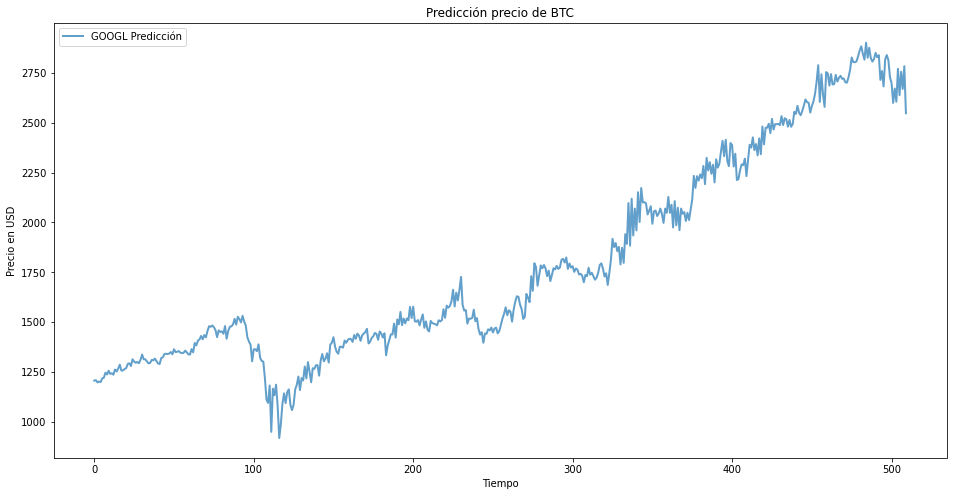

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.plot(y_test_predict, label = 'GOOGL Predicción', lw = 2, alpha = 0.7)
#plt.plot(Y_test, label = 'GOOGL Observado', lw = 2, alpha = 0.7)
plt.title('Predicción precio de BTC')
plt.ylabel('Precio en USD')
plt.xlabel('Tiempo')
plt.legend()
plt.show()